# Applying NCFS on Colon_Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

import import_ipynb
import NCFS

importing Jupyter notebook from NCFS.ipynb


In [4]:
# Reading dataset into dataframe
path = os.path.abspath('colon - labled.csv')
dataset = pd.read_csv(path) 
dataset.head()

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,...,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,...,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,...,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,...,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,...,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250,Abnormal


# Data Preprocessing

In [3]:
df_features = dataset.drop(["Unnamed: 0","Class"],axis=1)
df_features.shape

(62, 2000)

In [4]:
df_labels = pd.DataFrame(dataset[dataset.columns[-1]])
df_labels.head()

,Class
0,Abnormal
1,Normal
2,Abnormal
3,Normal
4,Abnormal


In [5]:
df_labels.tail()

,Class
57,Abnormal
58,Abnormal
59,Normal
60,Abnormal
61,Normal


In [6]:
le = preprocessing.LabelEncoder()
le.fit(df_labels.values.ravel())
le.classes_
df_labels = pd.DataFrame(data=le.transform(df_labels.values.ravel()),columns=['Class']) 
df_labels.head()


,Class
0,0
1,1
2,0
3,1
4,0


In [7]:
df_features.head()

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,...,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125
1,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,...,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375
2,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,...,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625
3,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,...,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500
4,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,...,126.46429,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250


In [8]:
# Normalizing features values from 0-1 as mentioned in paper
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_features)
df_features = scaler.transform(df_features)
df_features

array([[0.5149574 , 0.46582878, 0.40812511, ..., 0.18135395, 0.40589934,
        0.1891166 ],
       [0.55930626, 0.60852684, 0.49265239, ..., 0.46934906, 0.20185236,
        0.09055037],
       [0.14743615, 0.63713195, 0.55897739, ..., 0.09559365, 0.05355907,
        0.0771837 ],
       ...,
       [0.3715513 , 0.23818996, 0.17583425, ..., 0.33158138, 0.45593787,
        0.01335633],
       [0.33328462, 0.29899371, 0.24866094, ..., 0.29179341, 0.1402725 ,
        0.14419263],
       [0.4287493 , 0.25892362, 0.19883967, ..., 0.18534702, 0.23001659,
        0.27943972]])

# Applying NCFS algorithm for feature selection

In [9]:
feature_select = NCFS.NCFS(eta=0.2)
feature_select.fit(df_features, df_labels.values)
print(feature_select)
print(feature_select.coef_)

NCFS(alpha=0.1, eta=0.2, kernel='exponential', metric='cityblock', reg=1,
     sigma=1, solver='ncfs')
[0.01117458 0.01475072 0.02278753 ... 0.01820731 0.00842601 0.00905899]


# Plotting the weight vector against corresponding features

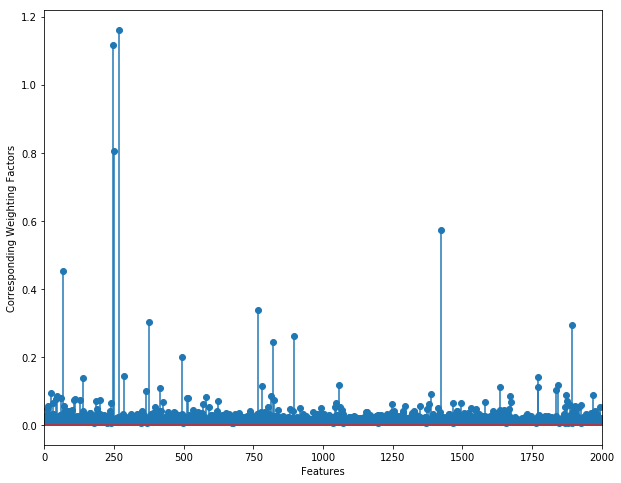

In [10]:
plt.figure(figsize=(10,8))
plt.xlim(0,df_features.shape[1]+1)  # set up the plot limits
plt.stem(np.arange(1,df_features.shape[1]+1),(feature_select.coef_))
plt.xlabel('Features')
plt.ylabel('Corresponding Weighting Factors')
plt.show()

In [11]:
# Sort the weight vector in ascending order
w_sorted = np.sort(feature_select.coef_)
# Sort the weight vector in descending order
w_sorted = w_sorted[::-1]  # reverse w_sorted (first element of array becomes last)
# Sort the indices of weight vector in ascending order
w_sortedindex = np.argsort(feature_select.coef_)
# Sort the indices of weight vector in descending order
w_sortedindex = w_sortedindex[::-1] # reverse w_sortedindex (first element of array becomes last)

# Classification Algorithm (KNN):

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve, learning_curve

In [13]:
# DER = Diagnosis Error Rate (Classification error rate)

# To store DER for first 50 top-ranked features:
DER = np.empty(50)

# Calculate loop for 1 to 50 top-ranked features:
for i in range(1,51):
    selected_wt = w_sorted[0:i] # selected weights from 0 to i-1
    selected_indices = w_sortedindex[0:i] # selected weight vector indices
    df_selected = pd.DataFrame(data = df_features[:,selected_indices],columns = selected_indices) # dataframe of selected features
          
    loo = LeaveOneOut() # for leaveOneOut cross validation
    model = KNeighborsClassifier(n_neighbors = 3,metric='manhattan',p=1) # KNN model object
    scores = cross_val_score(model , X = df_selected , y = df_labels.values.ravel() , cv = loo, scoring='accuracy') # Cross validation scores
    DER[i-1] = 100 -scores.mean()*100 # DER for selected top-ranked features from 0 to i-1
    
    

In [14]:
# Display 50 values of DER 
print(DER)

[24.19354839 29.03225806 17.74193548 14.51612903 17.74193548 17.74193548
 17.74193548 19.35483871 14.51612903 17.74193548 17.74193548 19.35483871
 16.12903226 14.51612903 12.90322581 14.51612903 16.12903226 17.74193548
 16.12903226 16.12903226 12.90322581 12.90322581 14.51612903 16.12903226
 16.12903226 16.12903226 14.51612903 14.51612903 12.90322581 12.90322581
 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581
 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581
 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581 12.90322581
 12.90322581 12.90322581]


In [15]:
# Display optimal features with min classification error
print("Number of optimal features:{}\nMin Diagnosis Error Rate:{:.1f}".format(DER.argmin()+1,DER.min()))

Number of optimal features:15
Min Diagnosis Error Rate:12.9


In [16]:
# DER on all genes (without feature selection)

df_features1 = pd.DataFrame(data = df_features) # data frame of all the features 
loo = LeaveOneOut()
model = KNeighborsClassifier(n_neighbors = 3, metric ='manhattan',p=1)
scores = cross_val_score(model , X = df_features1 , y = df_labels.values.ravel() , cv = loo,scoring='accuracy') 
DER_allgenes = 100-scores.mean()*100.0 # DER for KNN when all features were used 
print('DER for KNN when all genes (features) were used: ',DER_allgenes)


DER for KNN when all genes (features) were used:  20.967741935483872


# Plot of DER with top 50 ranked features vs DER with all the features

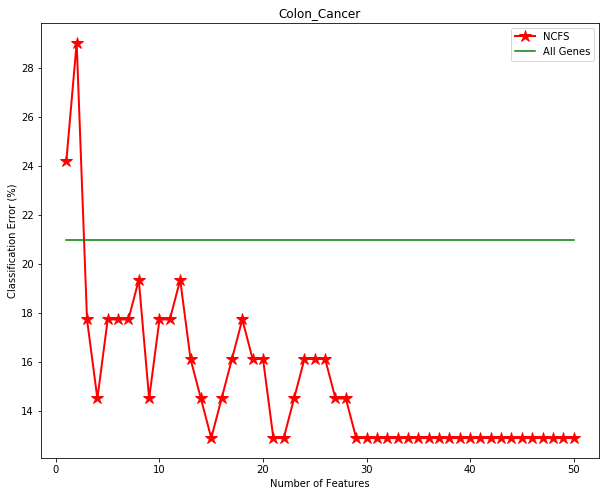

In [17]:
x = np.array(range(1,51))
plt.figure(figsize=(10,8))
plt.title('Colon_Cancer')
plt.xlabel('Number of Features')
plt.ylabel('Classification Error (%)')
plt.plot(x, DER, color='red', marker='*',linewidth=2, markersize=12)
plt.plot(x,np.full((50,),DER_allgenes), color='green')
plt.gca().legend(('NCFS','All Genes'))